<a href="https://colab.research.google.com/github/vivekgautamgv/Python-For-Finance/blob/main/Internship_Task_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  5 of 5 completed


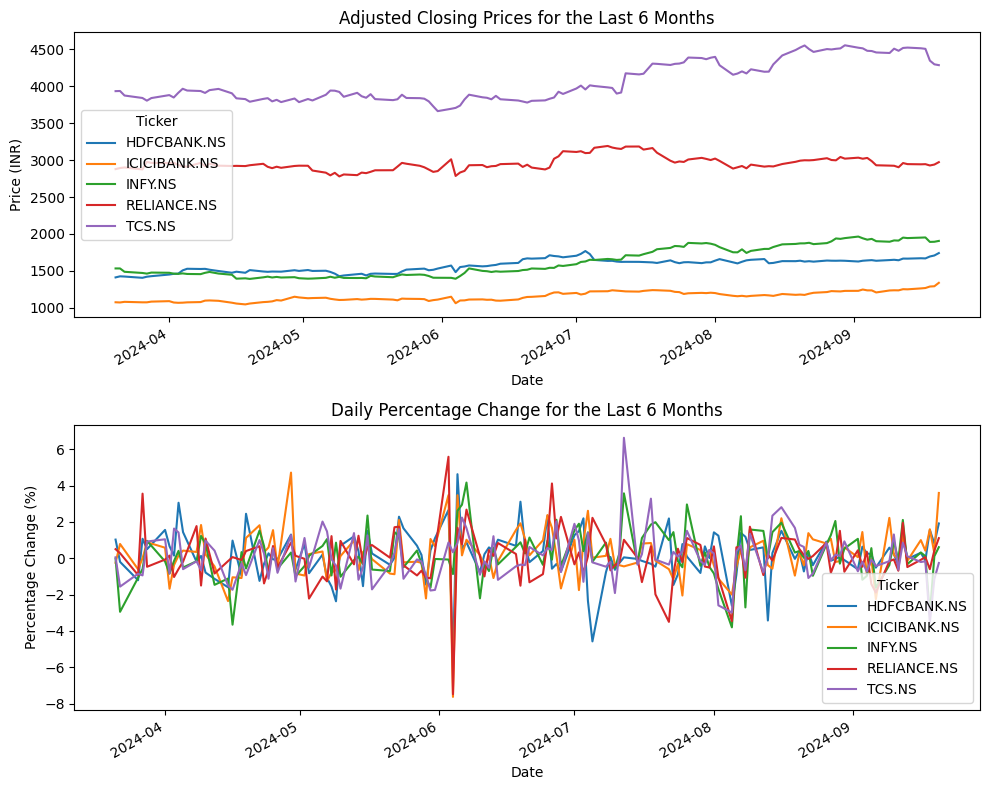

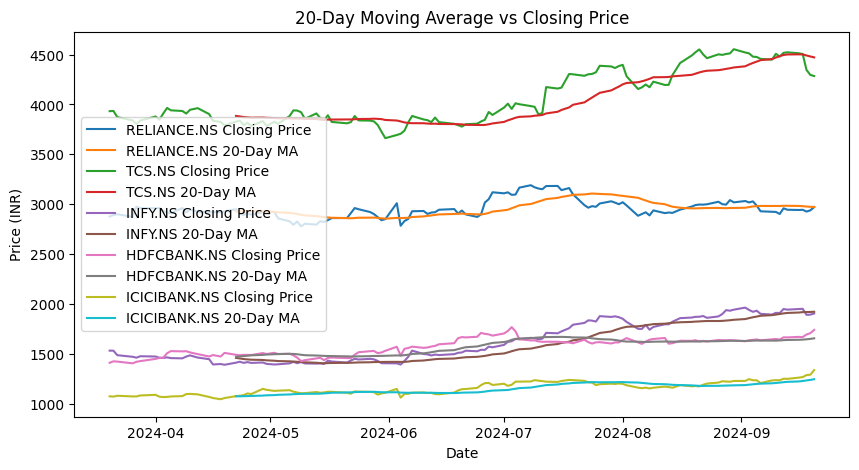

<ipython-input-2-a5799f9cbc4d>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data['Signal'][short_window:] = np.where(stocks_data['SMA50'][short_window:] > stocks_data['SMA200'][short_window:], 1.0, 0.0)


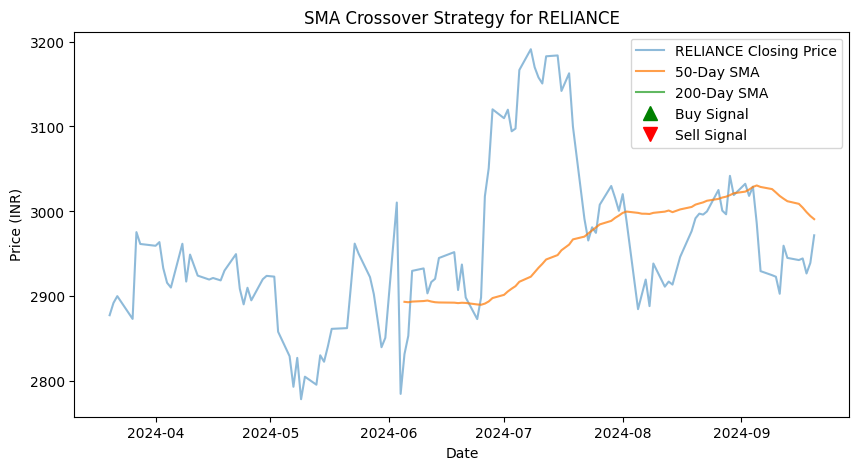

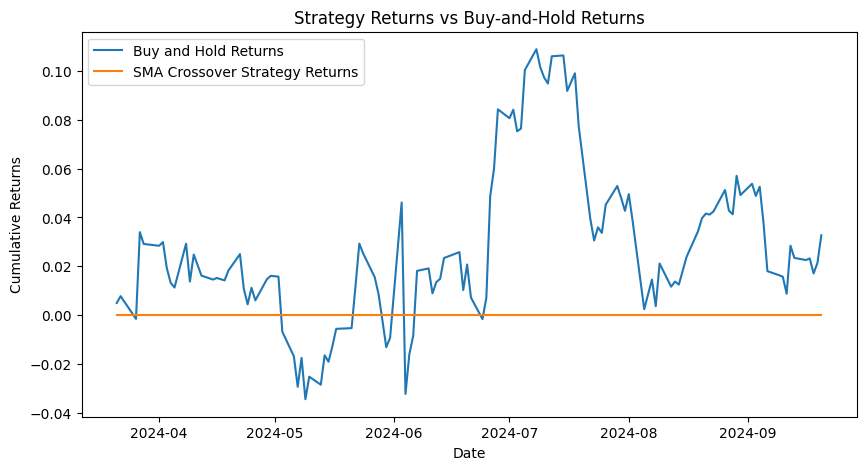

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define the stocks (choose 5 stocks from Nifty 50)
stock_symbols = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS']

# Fetch stock data for the last 6 months
stocks_data = yf.download(stock_symbols, period='6mo')

# 1. Data Analysis
# a. Calculate daily percentage change for each stock
daily_returns = stocks_data['Adj Close'].pct_change() * 100

# b. Plot the closing prices and daily percentage changes for the 5 stocks
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot the adjusted closing prices
stocks_data['Adj Close'].plot(ax=axs[0])
axs[0].set_title('Adjusted Closing Prices for the Last 6 Months')
axs[0].set_ylabel('Price (INR)')

# Plot the daily percentage changes
daily_returns.plot(ax=axs[1])
axs[1].set_title('Daily Percentage Change for the Last 6 Months')
axs[1].set_ylabel('Percentage Change (%)')

plt.tight_layout()
plt.show()

# c. Calculate the 20-day moving average and plot against the closing price
moving_average_20 = stocks_data['Adj Close'].rolling(window=20).mean()

# Plot 20-day moving averages against the adjusted closing prices
plt.figure(figsize=(10, 5))
for stock in stock_symbols:
    plt.plot(stocks_data['Adj Close'][stock], label=f'{stock} Closing Price')
    plt.plot(moving_average_20[stock], label=f'{stock} 20-Day MA')

plt.title('20-Day Moving Average vs Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

# 2. Strategy Development: Simple Moving Average Crossover Strategy
# Using one stock (e.g., RELIANCE.NS)

# Short-term and long-term moving averages
short_window = 50
long_window = 200

# Calculate short-term and long-term moving averages
stocks_data['SMA50'] = stocks_data['Adj Close']['RELIANCE.NS'].rolling(window=short_window).mean()
stocks_data['SMA200'] = stocks_data['Adj Close']['RELIANCE.NS'].rolling(window=long_window).mean()

# Create signals for crossover strategy
stocks_data['Signal'] = 0.0
stocks_data['Signal'][short_window:] = np.where(stocks_data['SMA50'][short_window:] > stocks_data['SMA200'][short_window:], 1.0, 0.0)
stocks_data['Position'] = stocks_data['Signal'].diff()

# Plot the closing price along with moving averages and buy/sell signals
plt.figure(figsize=(10, 5))
plt.plot(stocks_data['Adj Close']['RELIANCE.NS'], label='RELIANCE Closing Price', alpha=0.5)
plt.plot(stocks_data['SMA50'], label='50-Day SMA', alpha=0.75)
plt.plot(stocks_data['SMA200'], label='200-Day SMA', alpha=0.75)

# Plot buy signals
plt.plot(stocks_data[stocks_data['Position'] == 1].index,
         stocks_data['SMA50'][stocks_data['Position'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

# Plot sell signals
plt.plot(stocks_data[stocks_data['Position'] == -1].index,
         stocks_data['SMA50'][stocks_data['Position'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('SMA Crossover Strategy for RELIANCE')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

# 3. Calculate the returns from the strategy vs buy-and-hold
# Calculate daily returns
stocks_data['Returns'] = stocks_data['Adj Close']['RELIANCE.NS'].pct_change()

# Strategy returns based on the signals
stocks_data['Strategy Returns'] = stocks_data['Returns'] * stocks_data['Signal'].shift(1)

# Cumulative returns for the strategy and buy-and-hold
cumulative_returns = (1 + stocks_data['Returns']).cumprod() - 1
cumulative_strategy_returns = (1 + stocks_data['Strategy Returns']).cumprod() - 1

# Plot the cumulative returns
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='Buy and Hold Returns')
plt.plot(cumulative_strategy_returns, label='SMA Crossover Strategy Returns')
plt.title('Strategy Returns vs Buy-and-Hold Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()
